In [ ]:
#########################################################################################################################################
##################   TASK1:Explore the data and produce a couple plots that visualize it in an informative way.
#########################################################################################################################################

In [ ]:
# Mount Google Drive to access CSV files

from google.colab import drive
drive.mount('/content/drive')

# Set file paths
COMMON_PATH = '/content/drive/common.csv'
RARE_PATH   = '/content/drive/rare.csv'


Mounted at /content/drive


In [ ]:
# Import necessary libraries
# Input: none
# Method: import pandas, numpy, matplotlib, seaborn
# Output: libraries available for analysis and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set_style('whitegrid')
%matplotlib inline


In [ ]:
def load_data(path):
    """
    INPUT: file path to CSV
    METHOD: pd.read_csv
    OUTPUT: DataFrame with parsed columns;
            converts 'time' to datetime.time and 'isleak' to boolean.
    """
    df = pd.read_csv(path)
    # Parse time string as datetime.time
    df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.time
    # Convert isleak to boolean
    df['isleak'] = df['isleak'].map({'TRUE': True, 'FALSE': False})
    return df

# Load both datasets
common_df = load_data(COMMON_PATH)
rare_df   = load_data(RARE_PATH)


In [ ]:
def summarize(df, name):
    """
    INPUT: DataFrame and name label
    METHOD: prints shape, head, value counts for isleak
    OUTPUT: console summary of dataset size and leak frequency
    """
    print(f"--- {name} Dataset ---")
    print("Shape:", df.shape)
    print("Leak counts:\n", df['isleak'].value_counts())
    display(df.head())

# Summarize common and rare datasets
summarize(common_df, 'Common')
summarize(rare_df, 'Rare')


--- Common Dataset ---
Shape: (10000, 7)
Leak counts:
 Series([], Name: count, dtype: int64)


,Unnamed: 0,time,day,duration,flow_rate,variability,isleak
0,0,00:31:37,Sun,10,2.005437,0.445410,NaN
1,1,19:20:08,Sat,141,2.244325,0.097051,NaN
2,2,19:24:42,Thu,22,1.447766,0.328988,NaN
3,3,15:20:20,Sat,45,1.796816,0.670781,NaN
4,4,21:47:19,Mon,37,0.372023,0.347357,NaN


--- Rare Dataset ---
Shape: (50000, 7)
Leak counts:
 Series([], Name: count, dtype: int64)


,Unnamed: 0,time,day,duration,flow_rate,variability,isleak
0,0,04:44:08,Fri,80,0.793672,0.163550,NaN
1,1,21:47:41,Sat,174,0.893327,0.300954,NaN
2,2,15:52:03,Sun,179,1.971651,0.675501,NaN
3,3,13:12:29,Sat,17,1.966782,0.418537,NaN
4,4,22:16:24,Wed,33,0.675194,0.131303,NaN


In [ ]:
import pandas as pd

# Load the CSV files
common_df = pd.read_csv('/content/drive/common.csv')
rare_df   = pd.read_csv('/content/drive/rare.csv')

# Display the first few rows of each to inspect corruption or formats
print("----- common.csv head -----")
print(common_df.head(), "\n")

print("----- rare.csv head -----")
print(rare_df.head(), "\n")

# Verify unique values in 'isleak' column before conversion
print("common.csv unique isleak values before:", common_df['isleak'].unique())
print("rare.csv   unique isleak values before:",   rare_df['isleak'].unique(), "\n")

----- common.csv head -----
   Unnamed: 0      time  day  duration  flow_rate  variability  isleak
0           0   0:31:37  Sun        10   2.005437     0.445410   False
1           1  19:20:08  Sat       141   2.244325     0.097051   False
2           2  19:24:42  Thu        22   1.447766     0.328988   False
3           3  15:20:20  Sat        45   1.796816     0.670781   False
4           4  21:47:19  Mon        37   0.372023     0.347357   False 

----- rare.csv head -----
   Unnamed: 0      time  day  duration  flow_rate  variability  isleak
0           0   4:44:08  Fri        80   0.793672     0.163550   False
1           1  21:47:41  Sat       174   0.893327     0.300954   False
2           2  15:52:03  Sun       179   1.971651     0.675501   False
3           3  13:12:29  Sat        17   1.966782     0.418537   False
4           4  22:16:24  Wed        33   0.675194     0.131303   False 

common.csv unique isleak values before: [False  True]
rare.csv   unique isleak values befo

In [ ]:
import pandas as pd

# Load the CSV files
common_df = pd.read_csv('/content/drive/common.csv')
rare_df   = pd.read_csv('/content/drive/rare.csv')

# Ensure isleak is parsed as boolean
# If isleak is object dtype containing True/False, astype('bool') will convert strings 'True'/'False' too.
common_df['isleak'] = common_df['isleak'].astype('bool')
rare_df  ['isleak'] = rare_df ['isleak'].astype('bool')

# Convert boolean to integer (False→0, True→1)
common_df['isleak'] = common_df['isleak'].astype('int')
rare_df  ['isleak'] = rare_df ['isleak'].astype('int')

# Verify
print("common.csv unique isleak values after:", common_df['isleak'].unique())
print("rare.csv   unique isleak values after:", rare_df  ['isleak'].unique())




common.csv unique isleak values after: [0 1]
rare.csv   unique isleak values after: [0 1]


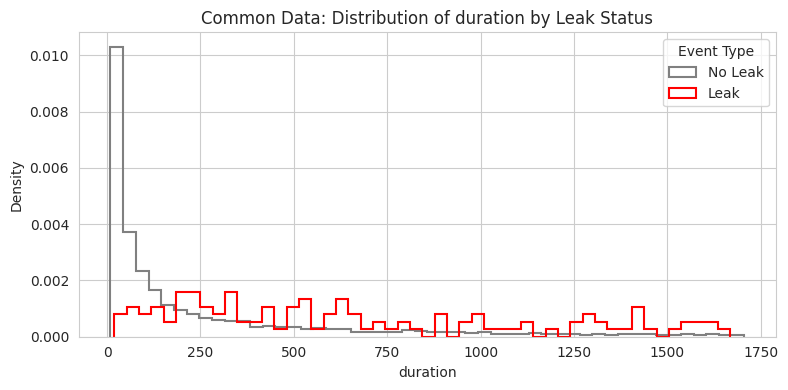

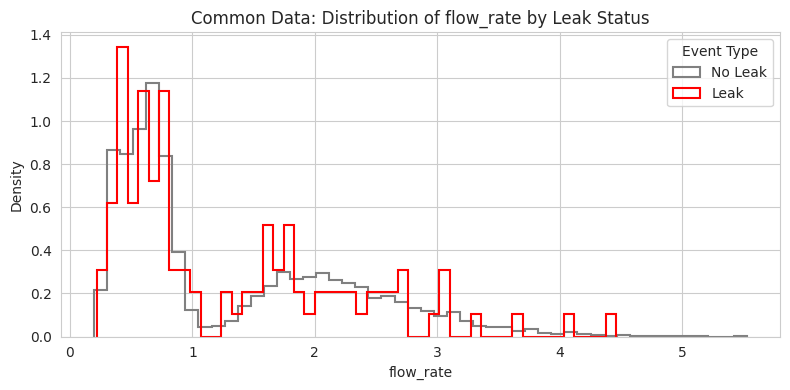

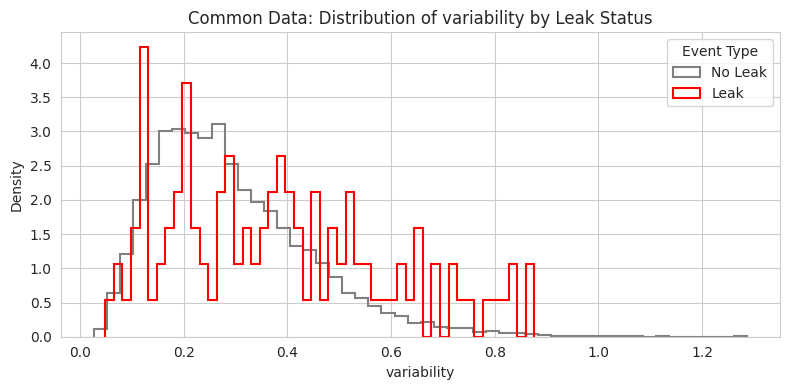

In [ ]:
import matplotlib.pyplot as plt

def plot_feature_distributions(df, features, title_prefix):
    """
    INPUT:
      df           – DataFrame with 'isleak' as integers 0/1
      features     – list of continuous feature names to plot
      title_prefix – prefix for each plot title

    METHOD:
      1. Map 0 → 'No Leak', 1 → 'Leak'.
      2. For each feature, plot two overlaid step histograms (density) for each class.

    OUTPUT:
      Matplotlib figures showing distributions by leak status.
    """
    df = df.copy()
    # Map integers to labels
    df['leak_label'] = df['isleak'].map({0: 'No Leak', 1: 'Leak'})

    for feat in features:
        no_leak = df.loc[df['leak_label'] == 'No Leak', feat].dropna()
        leak    = df.loc[df['leak_label'] == 'Leak', feat].dropna()

        plt.figure(figsize=(8, 4))
        if len(no_leak) > 0:
            plt.hist(no_leak, bins=50, density=True, histtype='step',
                     color='gray', label='No Leak', linewidth=1.5)
        if len(leak) > 0:
            plt.hist(leak, bins=50, density=True, histtype='step',
                     color='red', label='Leak', linewidth=1.5)

        plt.title(f"{title_prefix}: Distribution of {feat} by Leak Status")
        plt.xlabel(feat)
        plt.ylabel('Density')
        plt.legend(title='Event Type')
        plt.tight_layout()
        plt.show()

# Example usage:
plot_feature_distributions(common_df, ['duration', 'flow_rate', 'variability'], 'Common Data')


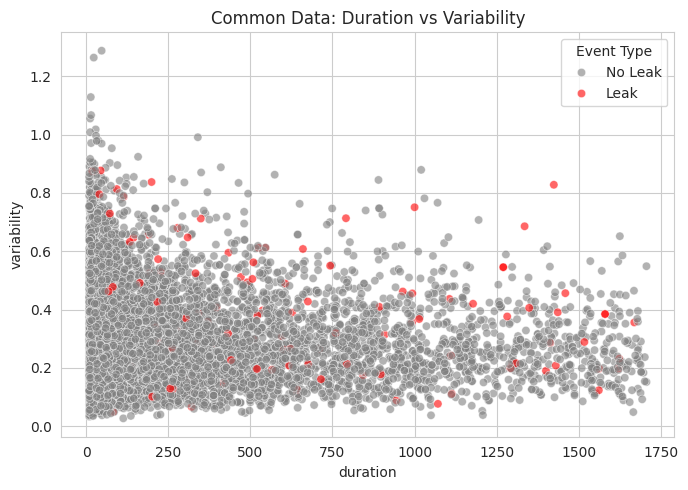

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_scatter(df, x, y, title):
    """
    INPUT:
      df     – DataFrame with 'isleak' as integers 0/1
      x, y   – names of numeric columns to plot
      title  – plot title string

    METHOD:
      1. Map 0→'No Leak' and 1→'Leak' into a new column 'leak_label'.
      2. Use seaborn.scatterplot with hue='leak_label' and an explicit palette.
      3. Draw legend using seaborn’s built‐in handles.

    OUTPUT:
      Displays a matplotlib scatter plot.
    """
    # Copy and create human‐readable labels
    df = df.copy()
    df['leak_label'] = df['isleak'].map({0: 'No Leak', 1: 'Leak'})

    plt.figure(figsize=(7, 5))
    sns.scatterplot(
        data=df,
        x=x,
        y=y,
        hue='leak_label',
        palette={'No Leak': 'gray', 'Leak': 'red'},
        alpha=0.6
    )
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend(title='Event Type')
    plt.tight_layout()
    plt.show()

# Example usage:
plot_scatter(common_df, 'duration', 'variability', 'Common Data: Duration vs Variability')


/tmp/ipython-input-11-3657278359.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=leaks_by_day.index, y=leaks_by_day.values, palette='Reds')


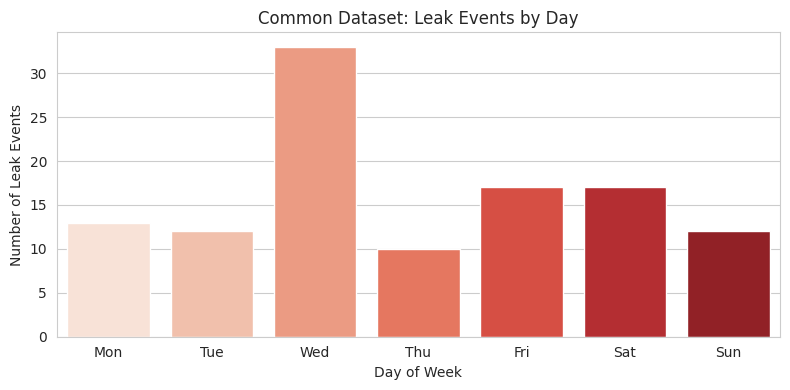


Common Dataset: Leak Events by Day:
 day
Mon    13
Tue    12
Wed    33
Thu    10
Fri    17
Sat    17
Sun    12
Name: isleak, dtype: int64


/tmp/ipython-input-11-3657278359.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=leaks_by_day.index, y=leaks_by_day.values, palette='Reds')


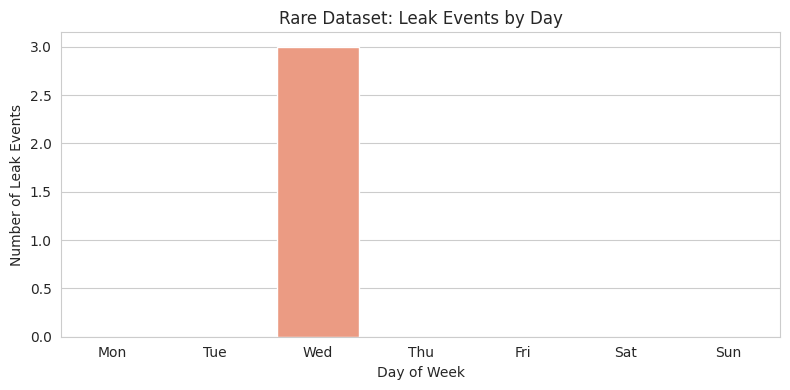


Rare Dataset: Leak Events by Day:
 day
Mon    0
Tue    0
Wed    3
Thu    0
Fri    0
Sat    0
Sun    0
Name: isleak, dtype: int64
Day with most leaks (common): Wed
Day with most leaks (rare):   Wed

Common Dataset: Average metrics on leak days vs non-leak days


,total_events,leak_events,avg_duration,avg_flow_rate,avg_variability,leak_rate
day,,,,,,
Mon,1389,13,242.7,1.26,0.30,0.94%
Tue,1223,12,272.5,1.24,0.30,0.98%
Wed,1903,33,235.9,1.37,0.28,1.73%
Thu,1229,10,268.0,1.24,0.29,0.81%
Fri,1440,17,274.7,1.29,0.30,1.18%
Sat,1358,17,255.7,1.29,0.29,1.25%
Sun,1458,12,241.3,1.35,0.30,0.82%



Rare Dataset: Average metrics on leak days vs non-leak days


,total_events,leak_events,avg_duration,avg_flow_rate,avg_variability,leak_rate
day,,,,,,
Mon,6728,0,240.2,1.33,0.28,0.00%
Tue,7092,0,239.6,1.47,0.27,0.00%
Wed,7706,3,229.0,1.43,0.27,0.04%
Thu,7844,0,231.0,1.37,0.27,0.00%
Fri,6990,0,241.2,1.28,0.27,0.00%
Sat,6472,0,241.1,1.34,0.28,0.00%
Sun,7168,0,235.5,1.50,0.27,0.00%


/tmp/ipython-input-11-3657278359.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-11-3657278359.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-11-3657278359.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


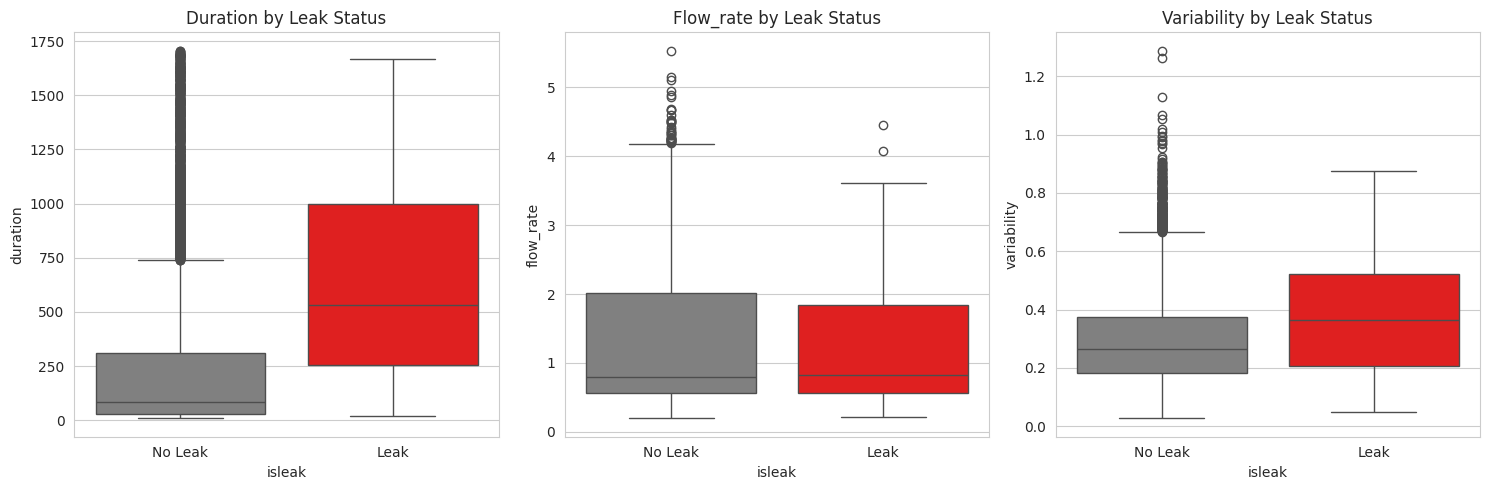

In [ ]:
# Load and prepare datasets
def load_prepare(path):
    df = pd.read_csv(path)
    # Map 'FALSE'/'TRUE' strings to integers 0/1
    df['isleak'] = df['isleak'].map({'FALSE': 0, 'TRUE': 1})
    return df

# Define the weekday order
day_order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

# Plot leak counts by day
def plot_leaks_by_day(df, title):
    # Sum leaks per day
    leaks_by_day = df.groupby('day')['isleak'].sum().reindex(day_order)
    plt.figure(figsize=(8,4))
    sns.barplot(x=leaks_by_day.index, y=leaks_by_day.values, palette='Reds')
    plt.title(title)
    plt.xlabel('Day of Week')
    plt.ylabel('Number of Leak Events')
    plt.tight_layout()
    plt.show()
    # Print numeric summary
    print(f"\n{title}:\n", leaks_by_day)

# Plot for both datasets
plot_leaks_by_day(common_df, 'Common Dataset: Leak Events by Day')
plot_leaks_by_day(rare_df,   'Rare Dataset: Leak Events by Day')

# Identify day with most leaks
common_peak = common_df.groupby('day')['isleak'].sum().idxmax()
rare_peak   = rare_df.groupby('day')['isleak'].sum().idxmax()
print(f"Day with most leaks (common): {common_peak}")
print(f"Day with most leaks (rare):   {rare_peak}")

# Intelligent inferences: compare average metrics on leak vs non-leak days
for name, df in [('Common', common_df), ('Rare', rare_df)]:
    print(f"\n{name} Dataset: Average metrics on leak days vs non-leak days")
    by_day = df.groupby('day').agg(
        total_events=('isleak','count'),
        leak_events=('isleak','sum'),
        avg_duration=('duration','mean'),
        avg_flow_rate=('flow_rate','mean'),
        avg_variability=('variability','mean')
    ).reindex(day_order)
    by_day['leak_rate'] = by_day['leak_events'] / by_day['total_events']
    display(by_day.style.format({
        'leak_rate': '{:.2%}',
        'avg_duration': '{:.1f}',
        'avg_flow_rate': '{:.2f}',
        'avg_variability': '{:.2f}'
    }))

# Boxplots to visualize feature differences for leaks vs non-leaks
plt.figure(figsize=(15,5))
for i, feat in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(
        x='isleak',
        y=feat,
        data=common_df,
        palette=['gray', 'red']   # first color → isleak=0, second → isleak=1
    )
    plt.xticks([0, 1], ['No Leak', 'Leak'])
    plt.title(f"{feat.capitalize()} by Leak Status")
plt.tight_layout()
plt.show()


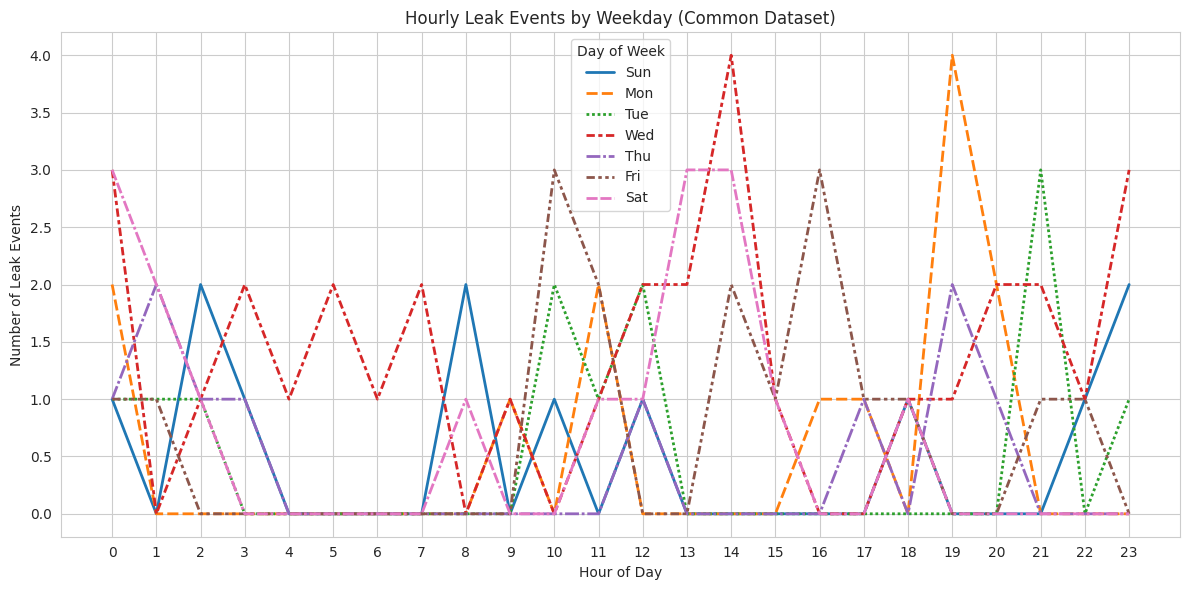

In [ ]:
# Time Series Analysis of Leak Events by Hour and Weekday
# Now proceed with the hourly aggregation
common_df['hour'] = pd.to_datetime(common_df['time'], format='%H:%M:%S').dt.hour

leaks_by_day_hour = (
    common_df
    .groupby(['day','hour'])['isleak']
    .sum()
    .reset_index()
)

ts_pivot = (
    leaks_by_day_hour
    .pivot(index='hour', columns='day', values='isleak')
    .reindex(columns=['Sun','Mon','Tue','Wed','Thu','Fri','Sat'])
    .fillna(0)
)

# Plot time series
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')
sns.lineplot(data=ts_pivot, palette='tab10', linewidth=2.0)

plt.title('Hourly Leak Events by Weekday (Common Dataset)')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Leak Events')
plt.xticks(range(0,24))
plt.legend(title='Day of Week')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# 1. Load the dataset

# 2. Ensure isleak_bool is Boolean (True for leaks, False otherwise)
#    If isleak is integers 0/1:
common_df['isleak_bool'] = common_df['isleak'].astype(bool)

# 3. Parse the 'time' column and extract hour (0–23)
common_df['hour'] = pd.to_datetime(common_df['time'], format='%H:%M:%S', errors='coerce').dt.hour

# 4. Filter only leak events using a Boolean mask
leaks = common_df[common_df['isleak_bool']]

# 5. Count leaks per day-hour to identify peak hours
day_hour_counts = (
    leaks
    .groupby(['day', 'hour'])
    .size()
    .reset_index(name='leak_count')
)

# 6. Find the peak hour for each day
peak_hours = day_hour_counts.loc[
    day_hour_counts.groupby('day')['leak_count'].idxmax()
].reset_index(drop=True)

# 7. For each peak (day, hour), find the exact timestamp(s) with the most leaks
results = []
for _, row in peak_hours.iterrows():
    day, hour, count = row['day'], row['hour'], row['leak_count']
    subset = leaks[(leaks['day'] == day) & (leaks['hour'] == hour)]
    time_counts = subset['time'].value_counts()
    max_time_count = time_counts.max()
    peak_times = time_counts[time_counts == max_time_count].index.tolist()
    results.append({
        'day': day,
        'hour': hour,
        'leak_count_at_hour': count,
        'max_leak_occurrences': max_time_count,
        'peak_times': peak_times
    })

# 8. Present results as a DataFrame
peak_time_df = pd.DataFrame(results)
print(peak_time_df)


   day  hour  leak_count_at_hour  max_leak_occurrences  \
0  Fri    10                   3                     1   
1  Mon    19                   4                     1   
2  Sat     0                   3                     1   
3  Sun     2                   2                     1   
4  Thu     1                   2                     1   
5  Tue    21                   3                     1   
6  Wed    14                   4                     1   

                                 peak_times  
0            [10:55:34, 10:15:07, 10:20:12]  
1  [19:12:01, 19:20:56, 19:42:58, 19:53:57]  
2               [0:16:22, 0:21:00, 0:11:12]  
3                        [2:34:53, 2:00:08]  
4                        [1:15:16, 1:08:53]  
5            [21:39:53, 21:51:32, 21:34:16]  
6  [14:32:50, 14:24:23, 14:54:07, 14:37:44]  


In [ ]:
import pandas as pd
import numpy as np

 # 1. Load and prepare the common dataset
 # Map isleak strings to integers 0/1


# 2. Extract temporal features
common_df['hour'] = pd.to_datetime(common_df['time'], format='%H:%M:%S').dt.hour
# Ensure day ordering consistency
day_order = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
common_df['day'] = pd.Categorical(common_df['day'], categories=day_order, ordered=True)

# =============================================================================
# Part 1: Exploratory Aggregation
# Compute average duration, flow_rate, variability for leak events by hour & day
# =============================================================================

# Filter only leak events
leaks = common_df[common_df['isleak'] == 1]

# Group and aggregate
agg = (
    leaks
    .groupby(['hour','day'])
    .agg(
        avg_duration=('duration','mean'),
        avg_flow_rate=('flow_rate','mean'),
        avg_variability=('variability','mean')
    )
    .reset_index()
)

# Pivot into wide tables
pivot_duration = agg.pivot(index='hour', columns='day', values='avg_duration').reindex(day_order, axis=1)
pivot_flow     = agg.pivot(index='hour', columns='day', values='avg_flow_rate').reindex(day_order, axis=1)
pivot_var      = agg.pivot(index='hour', columns='day', values='avg_variability').reindex(day_order, axis=1)

# Display first few rows of each pivot
print("Average Leak Duration by Hour & Day:")
print(pivot_duration.head(), "\n")
print("Average Leak Flow Rate by Hour & Day:")
print(pivot_flow.head(), "\n")
print("Average Leak Variability by Hour & Day:")
print(pivot_var.head(), "\n")

# =============================================================================
# Part 2: Feature Engineering for Modeling
# =============================================================================

# 1. Encode hour as cyclical features
common_df['hour_sin'] = np.sin(2 * np.pi * common_df['hour'] / 24)
common_df['hour_cos'] = np.cos(2 * np.pi * common_df['hour'] / 24)

# 2. One-hot encode day of week
day_dummies = pd.get_dummies(common_df['day'], prefix='day')
common_df = pd.concat([common_df, day_dummies], axis=1)

# 3. Weekend and midweek flags
common_df['is_weekend'] = common_df['day'].isin(['Sat','Sun']).astype(int)
common_df['is_midweek'] = common_df['day'].isin(['Wed']).astype(int)

# 4. Peak hour flag (e.g., 7–9 AM or 6–8 PM)
peak_hours = list(range(7,10)) + list(range(18,21))
common_df['is_peak_hour'] = common_df['hour'].isin(peak_hours).astype(int)

# 5. Interaction features
common_df['dur_x_hour_sin']    = common_df['duration'] * common_df['hour_sin']
common_df['var_x_is_midweek']  = common_df['variability'] * common_df['is_midweek']
common_df['fr_x_peak_hour']    = common_df['flow_rate'] * common_df['is_peak_hour']

# 6. Baseline temporal statistics for leaks
#   – precompute on training data
hour_stats = leaks.groupby('hour').agg(
    baseline_dur_hour=('duration','mean'),
    baseline_var_hour=('variability','mean')
)
day_stats = leaks.groupby('day').agg(
    baseline_dur_day=('duration','mean'),
    baseline_var_day=('variability','mean')
)

# Merge baseline stats back into full dataset
common_df = (
    common_df
    .merge(hour_stats, left_on='hour', right_index=True, how='left')
    .merge(day_stats,  left_on='day',  right_index=True, how='left')
)

# 7. Assemble final feature matrix
feature_cols = [
    'duration','flow_rate','variability',
    'hour_sin','hour_cos',
    'is_weekend','is_midweek','is_peak_hour'
] + list(day_dummies.columns) + [
    'dur_x_hour_sin','var_x_is_midweek','fr_x_peak_hour',
    'baseline_dur_hour','baseline_var_hour',
    'baseline_dur_day','baseline_var_day'
]

X = common_df[feature_cols]
y = common_df['isleak']

print("Feature matrix shape:", X.shape)
print("Sample of engineered features:")
print(X.head())


Average Leak Duration by Hour & Day:
day     Sun    Mon    Tue          Wed    Thu    Fri     Sat
hour                                                        
0     843.0  528.0  230.0   736.333333   40.0  525.0  1304.0
1       NaN    NaN  190.0          NaN  330.0   72.0   716.0
2     157.5    NaN   82.0  1669.000000  521.0    NaN   660.0
3     606.0    NaN    NaN   233.000000  509.0    NaN     NaN
4       NaN    NaN    NaN   897.000000    NaN    NaN     NaN 

Average Leak Flow Rate by Hour & Day:
day        Sun       Mon       Tue       Wed       Thu       Fri       Sat
hour                                                                      
0     1.519819  0.936663  1.810300  0.941148  2.446410  2.284761  0.627894
1          NaN       NaN  0.388794       NaN  1.183180  0.596084  1.808912
2     0.467572       NaN  1.018856  0.415875  2.018949       NaN  0.581548
3     1.847575       NaN       NaN  0.661098  1.298587       NaN       NaN
4          NaN       NaN       NaN  0.316587  

/tmp/ipython-input-14-4008580836.py:79: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_stats = leaks.groupby('day').agg(


/tmp/ipython-input-15-553841960.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg = leaks.groupby(['hour','day']).agg(


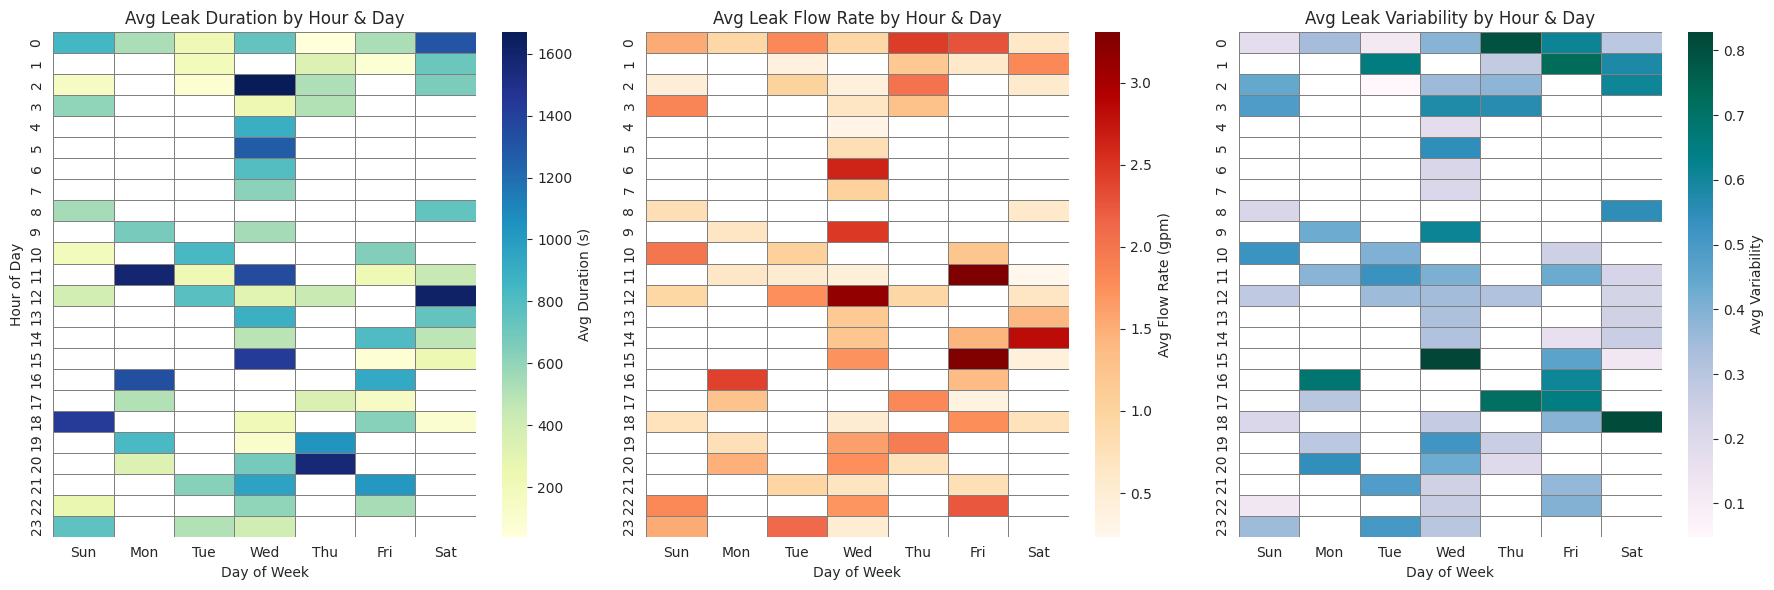

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load and prepare the common dataset

# 2. Extract hour and ensure day ordering
common_df['hour'] = pd.to_datetime(common_df['time'], format='%H:%M:%S').dt.hour
day_order = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
common_df['day'] = pd.Categorical(common_df['day'], categories=day_order, ordered=True)

# 3. Filter only leak events
leaks = common_df[common_df['isleak'] == 1]

# 4. Compute pivot tables of average metrics by hour & day
agg = leaks.groupby(['hour','day']).agg(
    avg_duration=('duration','mean'),
    avg_flow_rate=('flow_rate','mean'),
    avg_variability=('variability','mean')
).reset_index()

pivot_duration = agg.pivot(index='hour', columns='day', values='avg_duration').reindex(day_order, axis=1)
pivot_flow     = agg.pivot(index='hour', columns='day', values='avg_flow_rate').reindex(day_order, axis=1)
pivot_var      = agg.pivot(index='hour', columns='day', values='avg_variability').reindex(day_order, axis=1)

# 5. Plot heatmaps
sns.set_style('white')
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Duration heatmap
sns.heatmap(pivot_duration, ax=axes[0],
            cmap='YlGnBu', linewidths=0.5, linecolor='gray',
            cbar_kws={'label': 'Avg Duration (s)'},
            mask=pivot_duration.isna())
axes[0].set_title('Avg Leak Duration by Hour & Day')
axes[0].set_xlabel('Day of Week')
axes[0].set_ylabel('Hour of Day')

# Flow rate heatmap
sns.heatmap(pivot_flow, ax=axes[1],
            cmap='OrRd', linewidths=0.5, linecolor='gray',
            cbar_kws={'label': 'Avg Flow Rate (gpm)'},
            mask=pivot_flow.isna())
axes[1].set_title('Avg Leak Flow Rate by Hour & Day')
axes[1].set_xlabel('Day of Week')
axes[1].set_ylabel('')

# Variability heatmap
sns.heatmap(pivot_var, ax=axes[2],
            cmap='PuBuGn', linewidths=0.5, linecolor='gray',
            cbar_kws={'label': 'Avg Variability'},
            mask=pivot_var.isna())
axes[2].set_title('Avg Leak Variability by Hour & Day')
axes[2].set_xlabel('Day of Week')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# 1. Load and prepare the common dataset

# 2. Extract temporal features and keep day as string for merging
common_df['hour'] = pd.to_datetime(common_df['time'], format='%H:%M:%S').dt.hour
common_df['day_str'] = common_df['day'].astype(str)   # preserve original strings

# 3. Filter only leak events for baseline stats
leaks = common_df[common_df['isleak'] == 1]

# 4. Baseline temporal statistics (for feature context)
hour_stats = leaks.groupby('hour', observed=True).agg(
    baseline_dur_hour=('duration','mean'),
    baseline_var_hour=('variability','mean')
).reset_index()

day_stats = leaks.groupby('day', observed=True).agg(
    baseline_dur_day=('duration','mean'),
    baseline_var_day=('variability','mean')
).reset_index().rename(columns={'day':'day_str'})

# 5. Merge baseline stats back into full dataset on matching string keys
common_df = (
    common_df
    .merge(hour_stats, on='hour', how='left')
    .merge(day_stats,  on='day_str', how='left')
)

# 6. Cyclical encoding of hour
common_df['hour_sin'] = np.sin(2 * np.pi * common_df['hour'] / 24)
common_df['hour_cos'] = np.cos(2 * np.pi * common_df['hour'] / 24)

# 7. One-hot encode day of week (use original categorical for modeling)
day_order = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
common_df['day'] = pd.Categorical(common_df['day'], categories=day_order, ordered=True)
day_dummies = pd.get_dummies(common_df['day'], prefix='day')
common_df = pd.concat([common_df, day_dummies], axis=1)

# 8. Weekend and midweek flags
common_df['is_weekend'] = common_df['day'].isin(['Sat','Sun']).astype(int)
common_df['is_midweek'] = (common_df['day'] == 'Wed').astype(int)

# 9. Peak hour flag (morning 7–9 AM or evening 6–8 PM)
peak_hours = list(range(7,10)) + list(range(18,21))
common_df['is_peak_hour'] = common_df['hour'].isin(peak_hours).astype(int)

# 10. Interaction features
common_df['dur_x_hour_sin']   = common_df['duration']   * common_df['hour_sin']
common_df['var_x_is_midweek'] = common_df['variability'] * common_df['is_midweek']
common_df['fr_x_peak_hour']   = common_df['flow_rate']   * common_df['is_peak_hour']

# 11. Assemble final feature matrix and target vector
feature_cols = [
    'duration','flow_rate','variability',
    'hour_sin','hour_cos',
    'is_weekend','is_midweek','is_peak_hour'
] + list(day_dummies.columns) + [
    'dur_x_hour_sin','var_x_is_midweek','fr_x_peak_hour',
    'baseline_dur_hour','baseline_var_hour',
    'baseline_dur_day','baseline_var_day'
]

X = common_df[feature_cols]
y = common_df['isleak']

print("Feature matrix shape:", X.shape)
print("First five rows of X:")
print(X.head())


Feature matrix shape: (10000, 36)
First five rows of X:
   duration  flow_rate  variability  hour_sin  hour_cos  is_weekend  \
0        10   2.005437     0.445410  0.000000  1.000000           1   
1       141   2.244325     0.097051 -0.965926  0.258819           1   
2        22   1.447766     0.328988 -0.965926  0.258819           0   
3        45   1.796816     0.670781 -0.707107 -0.707107           1   
4        37   0.372023     0.347357 -0.707107  0.707107           0   

   is_midweek  is_peak_hour  day_Sun  day_Sun  ...  day_Sat  day_Sat  day_Sat  \
0           0             0     True     True  ...    False    False    False   
1           0             1    False    False  ...     True     True     True   
2           0             1    False    False  ...    False    False    False   
3           0             0    False    False  ...     True     True     True   
4           0             0    False    False  ...    False    False    False   

   dur_x_hour_sin  var_x_is_mi

In [ ]:
#########################################################################################################################################
##################   TASK2:Build a leak-detector for the data in common.csv. Please provide source code which does the following:
##################         > trains on the data in common.csv as needed reads a second csv file in the same format, and labels that data using the trained model
##################         > prints out metrics indicating the performance of the leak detector on the second csv input data
#########################################################################################################################################

In [ ]:
# leak_detector.py

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_recall_curve, auc

def load_and_prepare(path):
    """
    Load CSV, convert isleak to 0/1, extract temporal features, compute baseline stats,
    encode cyclical and categorical features, and assemble the feature matrix/target.
    """
    df = pd.read_csv(path)

    # 1. Label: handle both booleans and strings
    if df['isleak'].dtype == 'bool':
        # convert False/True → 0/1 directly
        df['isleak'] = df['isleak'].astype(int)
    else:
        # handle string values if present
        df['isleak'] = df['isleak'].map({'FALSE': 0, 'TRUE': 1})

    # 2. Temporal
    df['hour'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.hour
    df['day_str'] = df['day'].astype(str)

    # 3. Baseline stats (leak-only)
    leaks = df[df['isleak'] == 1]
    hour_stats = (leaks
        .groupby('hour', observed=True)
        .agg(baseline_dur_hour=('duration','mean'),
             baseline_var_hour=('variability','mean'))
        .reset_index())
    day_stats = (leaks
        .groupby('day', observed=True)
        .agg(baseline_dur_day=('duration','mean'),
             baseline_var_day=('variability','mean'))
        .reset_index()
        .rename(columns={'day':'day_str'}))

    # 4. Merge baseline
    df = df.merge(hour_stats, on='hour', how='left') \
           .merge(day_stats,  on='day_str', how='left')

    # 5. Cyclical hour
    df['hour_sin'] = np.sin(2*np.pi*df['hour']/24)
    df['hour_cos'] = np.cos(2*np.pi*df['hour']/24)

    # 6. Day-of-week one-hot
    day_order = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
    df['day'] = pd.Categorical(df['day'], categories=day_order, ordered=True)
    dummies = pd.get_dummies(df['day'], prefix='day')
    df = pd.concat([df, dummies], axis=1)

    # 7. Flags
    df['is_weekend'] = df['day'].isin(['Sat','Sun']).astype(int)
    df['is_midweek'] = (df['day'] == 'Wed').astype(int)
    peak_hours = list(range(7,10)) + list(range(18,21))
    df['is_peak_hour'] = df['hour'].isin(peak_hours).astype(int)

    # 8. Interaction
    df['dur_x_hour_sin']   = df['duration']   * df['hour_sin']
    df['var_x_is_midweek'] = df['variability'] * df['is_midweek']
    df['fr_x_peak_hour']   = df['flow_rate']   * df['is_peak_hour']

    # 9. Feature list
    feature_cols = [
        'duration','flow_rate','variability',
        'hour_sin','hour_cos',
        'is_weekend','is_midweek','is_peak_hour'
    ] + list(dummies.columns) + [
        'dur_x_hour_sin','var_x_is_midweek','fr_x_peak_hour',
        'baseline_dur_hour','baseline_var_hour',
        'baseline_dur_day','baseline_var_day'
    ]
    X = df[feature_cols]
    y = df['isleak']
    return X, y

Xc, yc = load_and_prepare("/content/drive/common.csv")
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    Xc, yc, stratify=yc, test_size=0.2, random_state=42
)

from sklearn.metrics import precision_recall_curve, auc

def train_and_evaluate(X_train, y_train, X_test, y_test):
    """
    Train Random Forest and XGBoost classifiers, evaluate and print reports,
    and compute PR-AUC correctly.
    """
    # Random Forest baseline
    rf = RandomForestClassifier(
        n_estimators=200, max_depth=10,
        class_weight='balanced', random_state=42
    )
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    print("=== Random Forest ===")
    print(classification_report(y_test, y_pred_rf, digits=4))

    # XGBoost with imbalance handling
    n_neg, n_pos = np.bincount(y_train)
    xgb = XGBClassifier(
        objective='binary:logistic',
        scale_pos_weight=n_neg / max(1, n_pos),
        max_depth=6, learning_rate=0.1,
        n_estimators=500, use_label_encoder=False,
        eval_metric='logloss', random_state=42
    )
    xgb.fit(X_train, y_train)
    y_pred_xgb = xgb.predict(X_test)
    print("=== XGBoost ===")
    print(classification_report(y_test, y_pred_xgb, digits=4))

    # Correct PR-AUC computation: swap arguments to auc()
    y_score_rf  = rf.predict_proba(X_test)[:, 1]
    y_score_xgb = xgb.predict_proba(X_test)[:, 1]

    precision_rf, recall_rf, _   = precision_recall_curve(y_test, y_score_rf)
    precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_score_xgb)

    pr_auc_rf  = auc(recall_rf, precision_rf)
    pr_auc_xgb = auc(recall_xgb, precision_xgb)

    print(f"Random Forest PR-AUC: {pr_auc_rf:.4f}")
    print(f"XGBoost PR-AUC:      {pr_auc_xgb:.4f}")



print("\n*** Evaluating on common.csv ***\n")
train_and_evaluate(Xc_train, yc_train, Xc_test, yc_test)



*** Evaluating on common.csv ***

=== Random Forest ===
              precision    recall  f1-score   support

           0     0.9884    0.9949    0.9917      1977
           1     0.0000    0.0000    0.0000        23

    accuracy                         0.9835      2000
   macro avg     0.4942    0.4975    0.4958      2000
weighted avg     0.9771    0.9835    0.9803      2000



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:17:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


=== XGBoost ===
              precision    recall  f1-score   support

           0     0.9885    0.9965    0.9924      1977
           1     0.0000    0.0000    0.0000        23

    accuracy                         0.9850      2000
   macro avg     0.4942    0.4982    0.4962      2000
weighted avg     0.9771    0.9850    0.9810      2000

Random Forest PR-AUC: 0.0353
XGBoost PR-AUC:      0.0241


In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_recall_curve, auc
from xgboost import XGBClassifier

# 1. Load features X and labels y as before
X, y = load_and_prepare('/content/drive/common.csv')   # reuse load_and_prepare from earlier
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# -----------------------------------------------------------------------------
# A) One-Class SVM as anomaly detector (unsupervised)
# -----------------------------------------------------------------------------
# Train only on "normal" (non-leak) examples
svm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.01)   # nu controls assumed outlier fraction
svm.fit(X_train[y_train == 0])

# decision_function() gives signed distance; negative => outlier
scores_svm = svm.decision_function(X_test)
# choose threshold at e.g. 5th percentile of scores on validation normal set
thresh = np.percentile(svm.decision_function(X_train[y_train == 0]), 5)
y_pred_svm = (scores_svm < thresh).astype(int)

print("=== One-Class SVM Anomaly Detection ===")
print(classification_report(y_test, y_pred_svm, digits=4))

# -----------------------------------------------------------------------------
# B) Isolation Forest as anomaly detector
# -----------------------------------------------------------------------------
iso = IsolationForest(n_estimators=200, contamination=0.01, random_state=42)
iso.fit(X_train[y_train == 0])
scores_if = iso.decision_function(X_test)   # higher = more normal
thresh_if = np.percentile(iso.decision_function(X_train[y_train == 0]), 5)
y_pred_if = (scores_if < thresh_if).astype(int)

print("=== Isolation Forest Anomaly Detection ===")
print(classification_report(y_test, y_pred_if, digits=4))

# -----------------------------------------------------------------------------
# C) Cost-Sensitive Supervised XGBoost
# -----------------------------------------------------------------------------
# Compute weight so that false negatives are heavily penalized
# e.g. give leaks 10× the weight of normals
weights = np.where(y_train == 1, 10, 1)

xgb = XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=(len(y_train) - y_train.sum()) / max(1, y_train.sum()),
    max_depth=6,
    learning_rate=0.1,
    n_estimators=200,
    random_state=42
)
xgb.fit(X_train, y_train, sample_weight=weights)

y_pred_xgb = xgb.predict(X_test)
print("=== Cost-Sensitive XGBoost ===")
print(classification_report(y_test, y_pred_xgb, digits=4))

# PR-AUC comparison
for name, scores in [
    ("OneClassSVM", -scores_svm),   # invert so leaks=positive anomalies
    ("IsoForest", -scores_if),
    ("XGBoost", xgb.predict_proba(X_test)[:,1])
]:
    prec, rec, _ = precision_recall_curve(y_test, scores)
    print(f"{name} PR-AUC: {auc(rec, prec):.4f}")


=== One-Class SVM Anomaly Detection ===
              precision    recall  f1-score   support

           0     1.0000    0.2559    0.4076      1977
           1     0.0154    1.0000    0.0303        23

    accuracy                         0.2645      2000
   macro avg     0.5077    0.6280    0.2189      2000
weighted avg     0.9887    0.2645    0.4032      2000

=== Isolation Forest Anomaly Detection ===
              precision    recall  f1-score   support

           0     0.9890    0.9535    0.9709      1977
           1     0.0213    0.0870    0.0342        23

    accuracy                         0.9435      2000
   macro avg     0.5051    0.5202    0.5025      2000
weighted avg     0.9779    0.9435    0.9601      2000

=== Cost-Sensitive XGBoost ===
              precision    recall  f1-score   support

           0     0.9888    0.9858    0.9873      1977
           1     0.0345    0.0435    0.0385        23

    accuracy                         0.9750      2000
   macro avg  

In [ ]:
!pip install sdv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.2/181.2 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 155.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.8/73.8 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.5/193.5 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 101.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 9.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sdv.single_table import CTGANSynthesizer
from sdv.metadata import Metadata
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, precision_recall_curve
import warnings

warnings.filterwarnings("ignore")

# 1. Common feature engineering
def load_and_preprocess(path):
    df = pd.read_csv(path)
    # Normalize isleak
    df['isleak'] = df['isleak'].map({True:1, False:0, 'TRUE':1, 'FALSE':0})
    # Derive time features
    dt = pd.to_datetime(df['time'], format='%H:%M:%S')
    df['hour']     = dt.dt.hour
    df['minute']   = dt.dt.minute
    df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
    df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
    # Flow delta
    df['flow_delta'] = df['flow_rate'].diff().fillna(0)
    # Select only low-cardinality columns + label
    cols = [
        'duration','flow_rate','variability',
        'hour','minute','hour_sin','hour_cos','flow_delta',
        'isleak'
    ]
    return df[cols]

# 2. Load & preprocess training data
df_train     = load_and_preprocess('/content/drive/common.csv')
X_train_orig = df_train.drop(columns='isleak')
y_train_orig = df_train['isleak']

# 3. Fit CTGAN on reduced data
metadata     = Metadata.detect_from_dataframe(data=df_train, table_name='common')
synthesizer  = CTGANSynthesizer(metadata, epochs=100)
synthesizer.fit(df_train)

# 4. Moderate oversampling target (3:1 non-leak:leak)
n_nonleak    = int((y_train_orig == 0).sum())
n_leak       = int((y_train_orig == 1).sum())
target_leaks = max(1, n_nonleak // 3)
n_needed     = max(0, target_leaks - n_leak)

# 5. Generate synthetic leak rows
synthetic_leaks = []
batch_size      = max(500, n_needed * 2)
while len(synthetic_leaks) < n_needed:
    batch = synthesizer.sample(batch_size)
    leaks = batch[batch['isleak'] == 1]
    synthetic_leaks.append(leaks)
synthetic_leaks = pd.concat(synthetic_leaks, ignore_index=True).iloc[:n_needed]

# 6. Combine real + synthetic
df_bal = pd.concat([df_train, synthetic_leaks], ignore_index=True)
X_bal  = df_bal.drop(columns='isleak')
y_bal  = df_bal['isleak']

# 7. Train scaler + logistic pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf',    LogisticRegression(class_weight='balanced', max_iter=1000))
])
pipeline.fit(X_bal, y_bal)

# 8. Load & preprocess original test data (for reference)
df_test = load_and_preprocess('/content/drive/common.csv')
X_test  = df_test.drop(columns='isleak')
y_test  = df_test['isleak']

# 9. Choose threshold for ≥20% precision on original data
y_prob_orig = pipeline.predict_proba(X_test)[:,1]
prec, rec, thresh = precision_recall_curve(y_test, y_prob_orig)
mask = prec[:-1] >= 0.20
if mask.any():
    idx = np.argmax(rec[:-1][mask])
    thr = thresh[mask][idx]
else:
    thr = 0.5

print(f"Chosen threshold for ≥20% precision: {thr:.4f}\n")
print("=== Performance on common.csv ===")
print(classification_report(y_test, (y_prob_orig >= thr).astype(int), digits=4))

# 10. Load & preprocess rare.csv, then label and evaluate
df_rare = load_and_preprocess('/content/drive/rare.csv')
X_rare  = df_rare.drop(columns='isleak')
y_rare  = df_rare['isleak']

y_prob_rare = pipeline.predict_proba(X_rare)[:,1]
y_pred_rare = (y_prob_rare >= thr).astype(int)

print("=== Leak Detection on rare.csv ===")
print(classification_report(y_rare, y_pred_rare, digits=4))


Chosen threshold for ≥20% precision: 0.9731

=== Performance on common.csv ===
              precision    recall  f1-score   support

           0     0.9888    0.9992    0.9940      9886
           1     0.2000    0.0175    0.0323       114

    accuracy                         0.9880     10000
   macro avg     0.5944    0.5084    0.5131     10000
weighted avg     0.9798    0.9880    0.9830     10000

=== Leak Detection on rare.csv ===
              precision    recall  f1-score   support

           0     1.0000    0.9995    0.9997     49997
           1     0.0417    0.3333    0.0741         3

    accuracy                         0.9995     50000
   macro avg     0.5208    0.6664    0.5369     50000
weighted avg     0.9999    0.9995    0.9997     50000



In [ ]:
import pandas as pd
import numpy as np
from sdv.single_table import CTGANSynthesizer
from sdv.metadata import Metadata
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, precision_recall_curve, roc_curve
import warnings

warnings.filterwarnings("ignore")

# 1. Common feature engineering
def load_and_preprocess(path):
    df = pd.read_csv(path)
    # Normalize isleak
    df['isleak'] = df['isleak'].map({True:1, False:0, 'TRUE':1, 'FALSE':0})
    # Derive time features
    dt = pd.to_datetime(df['time'], format='%H:%M:%S')
    df['hour']     = dt.dt.hour
    df['minute']   = dt.dt.minute
    df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
    df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
    # Flow delta
    df['flow_delta'] = df['flow_rate'].diff().fillna(0)
    # Select low-cardinality features + label
    cols = [
        'duration','flow_rate','variability',
        'hour','minute','hour_sin','hour_cos','flow_delta',
        'isleak'
    ]
    return df[cols]

# 2. Load & preprocess training data
df_train     = load_and_preprocess('/content/drive/common.csv')
X_train_orig = df_train.drop(columns='isleak')
y_train_orig = df_train['isleak']

# 3. Fit CTGAN on reduced data
metadata     = Metadata.detect_from_dataframe(data=df_train, table_name='common')
synthesizer  = CTGANSynthesizer(metadata, epochs=100)
synthesizer.fit(df_train)

# 4. Oversample leaks more aggressively (1:1 ratio)
n_nonleak = int((y_train_orig==0).sum())
n_leak    = int((y_train_orig==1).sum())
n_needed  = max(0, n_nonleak - n_leak)
synthetic_leaks = []
batch_size = max(500, n_needed*2)
while len(synthetic_leaks) < n_needed:
    batch = synthesizer.sample(batch_size)
    leaks = batch[batch['isleak']==1]
    synthetic_leaks.append(leaks)
synthetic_leaks = pd.concat(synthetic_leaks, ignore_index=True).iloc[:n_needed]

# 5. Combine real + synthetic
df_bal = pd.concat([df_train, synthetic_leaks], ignore_index=True)
X_bal  = df_bal.drop(columns='isleak')
y_bal  = df_bal['isleak']

# 6. Train cost-sensitive pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(class_weight='balanced', max_iter=1000))
])
pipeline.fit(X_bal, y_bal)

# 7. Helper to compute best threshold under a false‐alarm budget
def select_threshold_by_fp(y_true, y_prob, max_fp_rate=0.02):
    fpr, tpr, thr = roc_curve(y_true, y_prob)
    # Find highest TPR where FPR <= max_fp_rate
    valid = fpr <= max_fp_rate
    if not valid.any():
        return 0.5
    best_idx = np.argmax(tpr[valid])
    return thr[valid][best_idx]

# 8. Evaluate on common.csv with adaptive threshold
df_common = load_and_preprocess('/content/drive/common.csv')
X_common = df_common.drop(columns='isleak')
y_common = df_common['isleak']
y_prob_c = pipeline.predict_proba(X_common)[:,1]
thr_common = select_threshold_by_fp(y_common, y_prob_c, max_fp_rate=0.02)

print(f"Threshold on common.csv for ≤2% FP: {thr_common:.4f}")
print("=== common.csv Performance ===")
print(classification_report(y_common, (y_prob_c>=thr_common).astype(int), digits=4))

# 9. Evaluate on rare.csv with its own threshold
df_rare = load_and_preprocess('/content/drive/rare.csv')
X_rare  = df_rare.drop(columns='isleak')
y_rare  = df_rare['isleak']
y_prob_r = pipeline.predict_proba(X_rare)[:,1]
thr_rare = select_threshold_by_fp(y_rare, y_prob_r, max_fp_rate=0.02)

print(f"Threshold on rare.csv for ≤2% FP: {thr_rare:.4f}")
print("=== rare.csv Performance ===")
print(classification_report(y_rare, (y_prob_r>=thr_rare).astype(int), digits=4))

# 10. Optionally, show 5% precision‐target threshold to boost recall
def select_threshold_by_precision(y_true, y_prob, min_precision=0.05):
    prec, rec, thr = precision_recall_curve(y_true, y_prob)
    # Find max recall where precision >= min_precision
    valid = prec[:-1] >= min_precision
    if not valid.any():
        return 0.5
    best_idx = np.argmax(rec[:-1][valid])
    return thr[valid][best_idx]

thr_common_p05 = select_threshold_by_precision(y_common, y_prob_c, min_precision=0.05)
print(f"Threshold for ≥5% precision on common.csv: {thr_common_p05:.4f}")


Threshold on common.csv for ≤2% FP: 0.8932
=== common.csv Performance ===
              precision    recall  f1-score   support

           0     0.9901    0.9813    0.9857      9886
           1     0.0842    0.1491    0.1076       114

    accuracy                         0.9718     10000
   macro avg     0.5371    0.5652    0.5466     10000
weighted avg     0.9798    0.9718    0.9757     10000

Threshold on rare.csv for ≤2% FP: 0.8800
=== rare.csv Performance ===
              precision    recall  f1-score   support

           0     1.0000    0.9801    0.9900     49997
           1     0.0030    1.0000    0.0060         3

    accuracy                         0.9801     50000
   macro avg     0.5015    0.9901    0.4980     50000
weighted avg     0.9999    0.9801    0.9899     50000

Threshold for ≥5% precision on common.csv: 0.7006


**Weighted sampling**  
 -  Easiest to implement: just pass a `sample_weight` array to `fit` or set `class_weight={0:1, 1:balance_ratio}` on your `LogisticRegression`/`pipeline`.  
 -  Immediate impact: forces every batch to include more leak‐class examples, boosting recall with almost no extra dependencies.

In [ ]:
#WEIGHTED SAMPLING ON COMMON.CSV AND TESTING ON RARE.CSV
import pandas as pd
import numpy as np
from sdv.single_table import CTGANSynthesizer
from sdv.metadata import Metadata
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, precision_recall_curve, roc_curve
import warnings

warnings.filterwarnings("ignore")

# 1. Common feature engineering
def load_and_preprocess(path):
    df = pd.read_csv(path)
    df['isleak'] = df['isleak'].map({True:1, False:0, 'TRUE':1, 'FALSE':0})
    dt = pd.to_datetime(df['time'], format='%H:%M:%S')
    df['hour']     = dt.dt.hour
    df['minute']   = dt.dt.minute
    df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
    df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
    df['flow_delta'] = df['flow_rate'].diff().fillna(0)
    cols = [
        'duration','flow_rate','variability',
        'hour','minute','hour_sin','hour_cos','flow_delta',
        'isleak'
    ]
    return df[cols]

# 2. Load & preprocess training data
df_train     = load_and_preprocess('/content/drive/common.csv')
X_train_orig = df_train.drop(columns='isleak')
y_train_orig = df_train['isleak']

# 3. Fit CTGAN on reduced data
metadata     = Metadata.detect_from_dataframe(data=df_train, table_name='common')
synthesizer  = CTGANSynthesizer(metadata, epochs=100)
synthesizer.fit(df_train)

# 4. Moderate oversampling target (3:1 non-leak:leak)
n_nonleak    = int((y_train_orig == 0).sum())
n_leak       = int((y_train_orig == 1).sum())
target_leaks = max(1, n_nonleak // 3)
n_needed     = max(0, target_leaks - n_leak)

# 5. Generate synthetic leak rows
synthetic_leaks = []
batch_size      = max(500, n_needed * 2)
while len(synthetic_leaks) < n_needed:
    batch = synthesizer.sample(batch_size)
    leaks = batch[batch['isleak'] == 1]
    synthetic_leaks.append(leaks)
synthetic_leaks = pd.concat(synthetic_leaks, ignore_index=True).iloc[:n_needed]

# 6. Combine real + synthetic
df_bal = pd.concat([df_train, synthetic_leaks], ignore_index=True)
X_bal  = df_bal.drop(columns='isleak')
y_bal  = df_bal['isleak']

# 7. Train scaler + logistic pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf',    LogisticRegression(class_weight='balanced', max_iter=1000))
])
pipeline.fit(X_bal, y_bal)

# 8. Load & preprocess common.csv for evaluation
df_common = load_and_preprocess('/content/drive/common.csv')
X_common  = df_common.drop(columns='isleak')
y_common  = df_common['isleak']

# 9. Select threshold for ≥10% precision on common.csv
y_prob_c = pipeline.predict_proba(X_common)[:,1]
prec, rec, thr = precision_recall_curve(y_common, y_prob_c)
mask = prec[:-1] >= 0.10
if mask.any():
    best_idx = np.argmax(rec[:-1][mask])
    thr_common = thr[mask][best_idx]
else:
    thr_common = 0.5

print(f"Threshold for ≥10% precision on common.csv: {thr_common:.4f}\n")
print("=== common.csv Performance ===")
print(classification_report(y_common, (y_prob_c >= thr_common).astype(int), digits=4))

# 10. Load & preprocess rare.csv then evaluate with ≤2% FP threshold
df_rare = load_and_preprocess('/content/drive/rare.csv')
X_rare  = df_rare.drop(columns='isleak')
y_rare  = df_rare['isleak']
y_prob_r = pipeline.predict_proba(X_rare)[:,1]

fpr, tpr, thr_r = roc_curve(y_rare, y_prob_r)
valid = fpr <= 0.02
if valid.any():
    thr_rare = thr_r[valid][np.argmax(tpr[valid])]
else:
    thr_rare = 0.5

print(f"Threshold for ≤2% FP on rare.csv: {thr_rare:.4f}\n")
print("=== rare.csv Performance ===")
print(classification_report(y_rare, (y_prob_r >= thr_rare).astype(int), digits=4))


Threshold for ≥10% precision on common.csv: 0.9624

=== common.csv Performance ===
              precision    recall  f1-score   support

           0     0.9890    0.9964    0.9926      9886
           1     0.1000    0.0351    0.0519       114

    accuracy                         0.9854     10000
   macro avg     0.5445    0.5157    0.5223     10000
weighted avg     0.9788    0.9854    0.9819     10000

Threshold for ≤2% FP on rare.csv: 0.9315

=== rare.csv Performance ===
              precision    recall  f1-score   support

           0     1.0000    0.9902    0.9951     49997
           1     0.0020    0.3333    0.0040         3

    accuracy                         0.9902     50000
   macro avg     0.5010    0.6618    0.4996     50000
weighted avg     0.9999    0.9902    0.9950     50000



In [ ]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 838.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 102.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.9/319.9 kB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 150.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 138.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 138.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 7.1 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.31.1
    Uninstalling protobuf-6.31.1:
      Successfully uninstalled protobuf-6.31.1


In [ ]:
#Replace the logistic‐regression classifier with a
#small Keras neural network trained using focal loss on the CTGAN-augmented dataset.
#This network will focus training on the hard (leak) examples generated by CTGAN.
#WEIGHTED SAMPLING ON COMMON.CSV AND TESTING ON RARE.CSV + FOCAL LOSS

import pandas as pd
import numpy as np
from sdv.single_table import CTGANSynthesizer
from sdv.metadata import Metadata
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, precision_recall_curve, roc_curve
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryFocalCrossentropy
import warnings

warnings.filterwarnings("ignore")

# 1. Common feature engineering
def load_and_preprocess(path):
    df = pd.read_csv(path)
    df['isleak'] = df['isleak'].map({True:1, False:0, 'TRUE':1, 'FALSE':0})
    dt = pd.to_datetime(df['time'], format='%H:%M:%S')
    df['hour']     = dt.dt.hour
    df['minute']   = dt.dt.minute
    df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
    df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
    df['flow_delta'] = df['flow_rate'].diff().fillna(0)
    return df[[
        'duration','flow_rate','variability',
        'hour','minute','hour_sin','hour_cos','flow_delta','isleak'
    ]]

# 2. Load & preprocess training data
df_train     = load_and_preprocess('/content/drive/common.csv')
X_train_orig = df_train.drop(columns='isleak')
y_train_orig = df_train['isleak']

# 3. Fit CTGAN
metadata     = Metadata.detect_from_dataframe(data=df_train, table_name='common')
synthesizer  = CTGANSynthesizer(metadata, epochs=100)
synthesizer.fit(df_train)

# 4. Moderate oversampling (3:1 non-leak:leak)
n_nonleak    = (y_train_orig == 0).sum()
n_leak       = (y_train_orig == 1).sum()
target_leaks = max(1, n_nonleak // 3)
n_needed     = max(0, target_leaks - n_leak)

# 5. Generate CTGAN leaks
synthetic_leaks = []
batch_size      = max(500, n_needed * 2)
while len(synthetic_leaks) < n_needed:
    batch = synthesizer.sample(batch_size)
    leaks = batch[batch['isleak'] == 1]
    synthetic_leaks.append(leaks)
synthetic_leaks = pd.concat(synthetic_leaks, ignore_index=True).iloc[:n_needed]

# 6. Combine real + synthetic
df_bal = pd.concat([df_train, synthetic_leaks], ignore_index=True)
X_bal  = df_bal.drop(columns='isleak')
y_bal  = df_bal['isleak'].values

# 7. Scale features
scaler = StandardScaler()
X_bal_scaled = scaler.fit_transform(X_bal)

# 8. Build & train Keras model with focal loss
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_bal_scaled.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss=BinaryFocalCrossentropy(gamma=2.0),
    metrics=['accuracy']
)
model.fit(
    X_bal_scaled, y_bal,
    epochs=20, batch_size=128,
    validation_split=0.1,
    verbose=2
)

# 9. Evaluate on common.csv with a 5% precision target
df_common = load_and_preprocess('/content/drive/common.csv')
X_common  = scaler.transform(df_common.drop(columns='isleak'))
y_common  = df_common['isleak'].values
y_prob_c  = model.predict(X_common).flatten()

prec, rec, thr = precision_recall_curve(y_common, y_prob_c)
mask = prec[:-1] >= 0.05
thr_common = thr[mask][np.argmax(rec[:-1][mask])] if mask.any() else 0.5

print(f"Threshold for ≥5% precision on common.csv: {thr_common:.4f}\n")
print("=== common.csv Performance ===")
print(classification_report(y_common, (y_prob_c >= thr_common).astype(int), digits=4))

# 10. Evaluate on rare.csv with ≤2% false-alarm threshold
df_rare = load_and_preprocess('/content/drive/rare.csv')
X_rare  = scaler.transform(df_rare.drop(columns='isleak'))
y_rare  = df_rare['isleak'].values
y_prob_r = model.predict(X_rare).flatten()

fpr, tpr, thr_r = roc_curve(y_rare, y_prob_r)
valid = fpr <= 0.02
thr_rare = thr_r[valid][np.argmax(tpr[valid])] if valid.any() else 0.5

print(f"Threshold for ≤2% FP on rare.csv: {thr_rare:.4f}\n")
print("=== rare.csv Performance ===")
print(classification_report(y_rare, (y_prob_r >= thr_rare).astype(int), digits=4))


Epoch 1/20
93/93 - 1s - 12ms/step - accuracy: 0.8187 - loss: 0.1158 - val_accuracy: 0.3116 - val_loss: 0.2994
Epoch 2/20
93/93 - 0s - 2ms/step - accuracy: 0.8604 - loss: 0.0912 - val_accuracy: 0.4261 - val_loss: 0.2641
Epoch 3/20
93/93 - 0s - 2ms/step - accuracy: 0.8663 - loss: 0.0843 - val_accuracy: 0.5269 - val_loss: 0.2310
Epoch 4/20
93/93 - 0s - 2ms/step - accuracy: 0.8771 - loss: 0.0797 - val_accuracy: 0.5118 - val_loss: 0.2473
Epoch 5/20
93/93 - 0s - 2ms/step - accuracy: 0.8880 - loss: 0.0759 - val_accuracy: 0.6088 - val_loss: 0.2007
Epoch 6/20
93/93 - 0s - 2ms/step - accuracy: 0.8951 - loss: 0.0719 - val_accuracy: 0.6050 - val_loss: 0.2086
Epoch 7/20
93/93 - 0s - 2ms/step - accuracy: 0.9046 - loss: 0.0687 - val_accuracy: 0.6482 - val_loss: 0.1875
Epoch 8/20
93/93 - 0s - 2ms/step - accuracy: 0.9083 - loss: 0.0641 - val_accuracy: 0.7134 - val_loss: 0.1603
Epoch 9/20
93/93 - 0s - 2ms/step - accuracy: 0.9176 - loss: 0.0607 - val_accuracy: 0.7051 - val_loss: 0.1632
Epoch 10/20
93/93 